<a href="https://colab.research.google.com/github/alecbidaran/Pytorch_excersies/blob/main/pytorchGeometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
data=dataset[0]
print(data.num_edges)
print(data.num_nodes)
print(data.num_features)
print(dataset.num_classes)

156
34
34
4


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

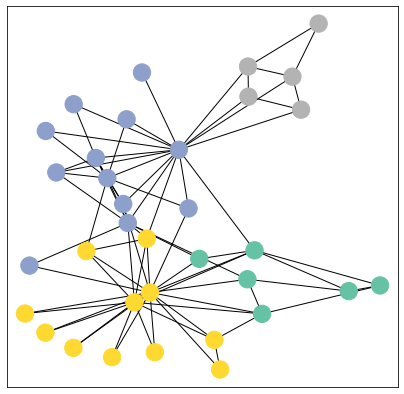

In [ ]:
from torch_geometric.utils import to_networkx
G=to_networkx(data,to_undirected=True)
visualize(G,color=data.y)

In [ ]:
from torch import nn 
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
  def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv=GCNConv(data.num_features,4)
        self.conv2=GCNConv(4,4)
        self.conv3=GCNConv(4,2)
        self.classifier=nn.Linear(2,dataset.num_classes)
  def forward(self,x,edge_index):
    h=self.conv(x,edge_index)
    h=h.tanh()
    h=self.conv2(h,edge_index)
    h=h.tanh()
    h=self.conv3(h,edge_index)
    h=h.tanh()
    out=self.classifier(h)
    return out,h

Embedding shape: [34, 2]


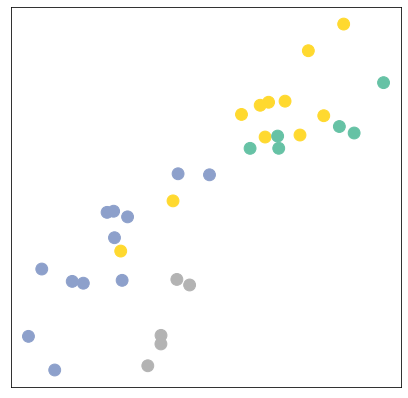

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

In [ ]:
model=GCN()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
import time 

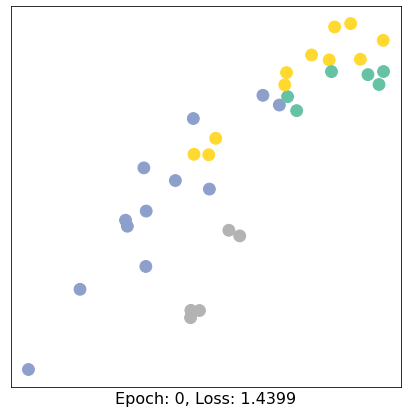

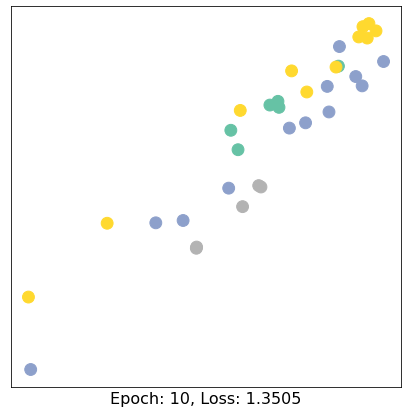

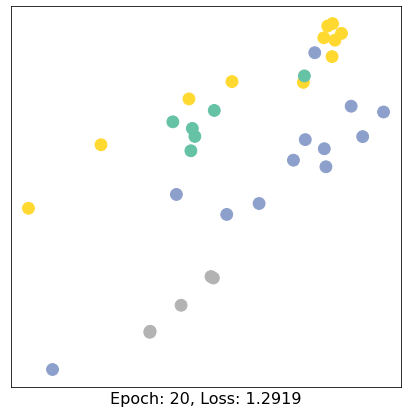

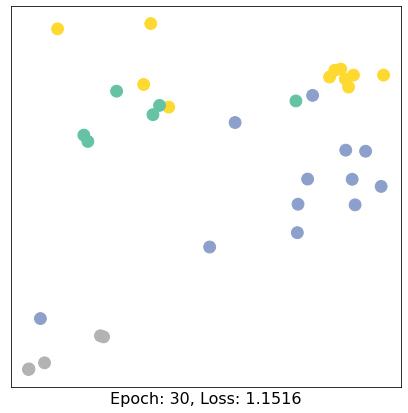

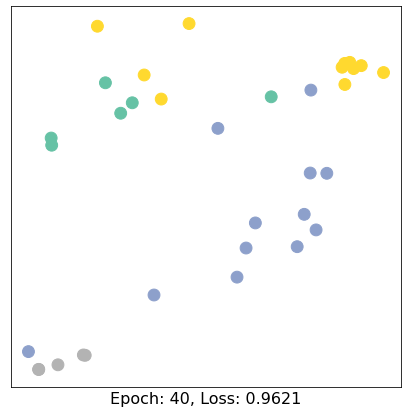

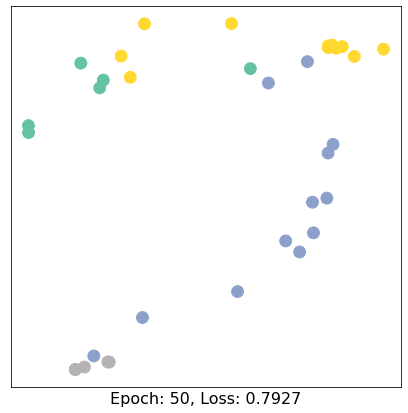

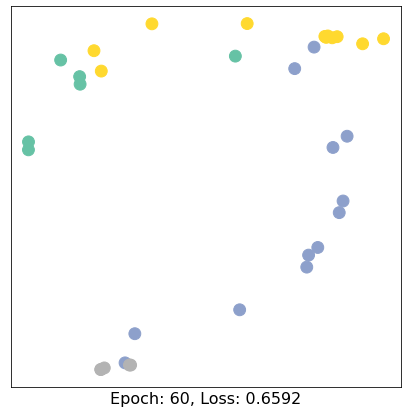

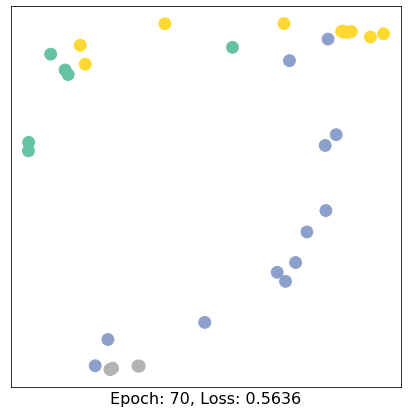

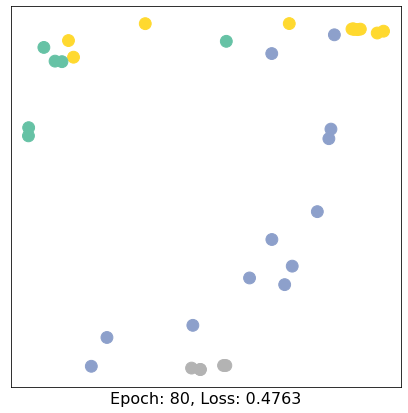

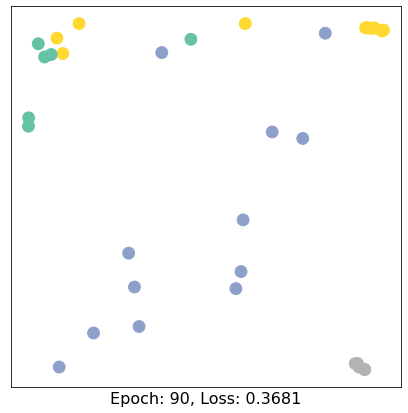

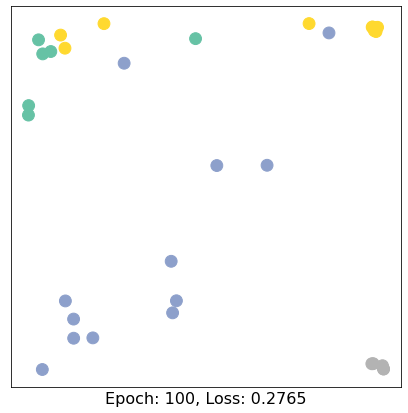

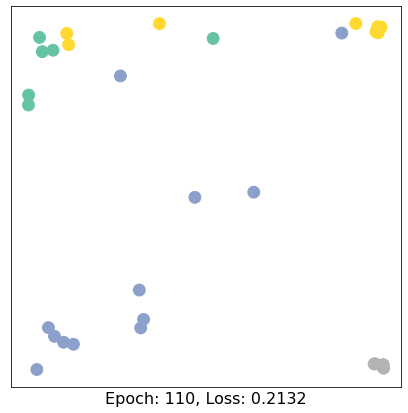

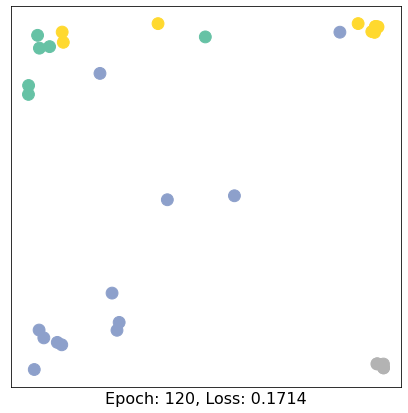

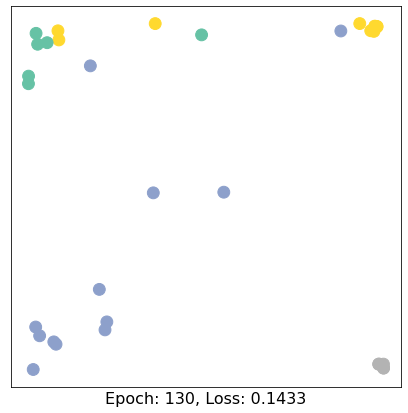

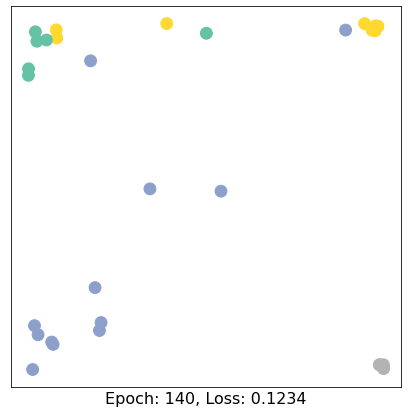

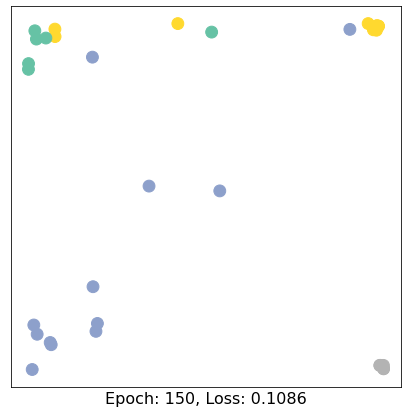

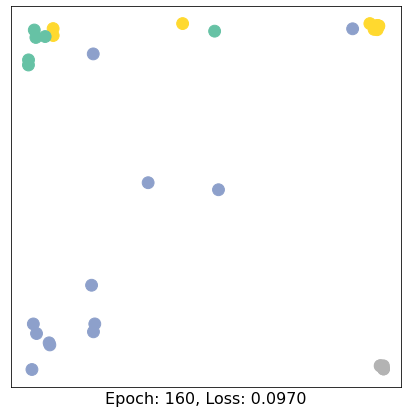

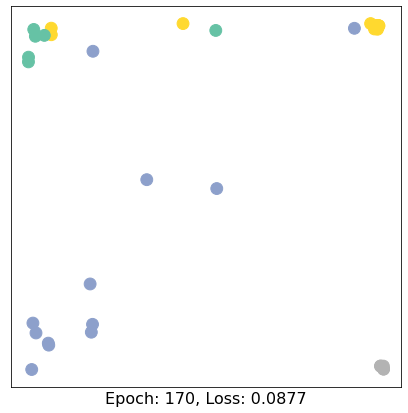

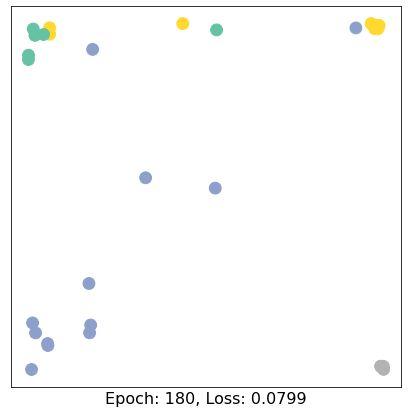

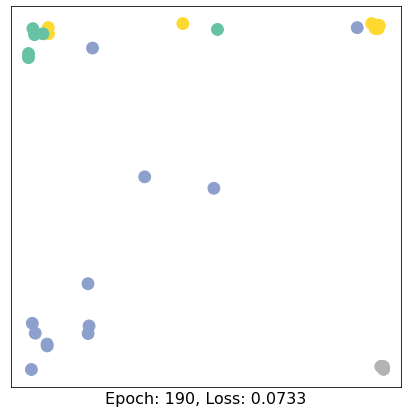

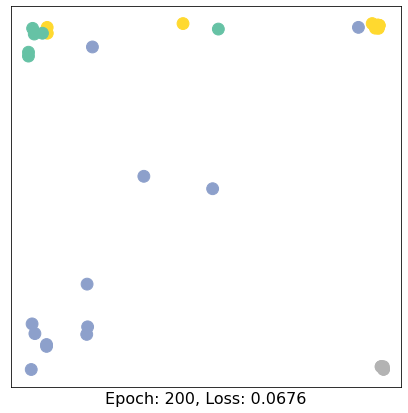

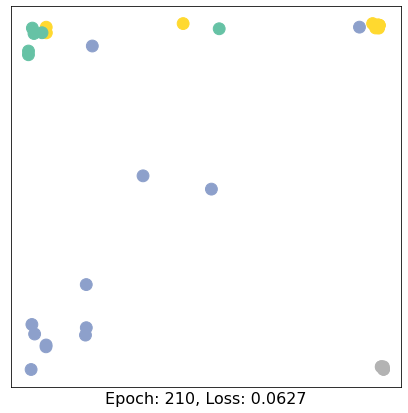

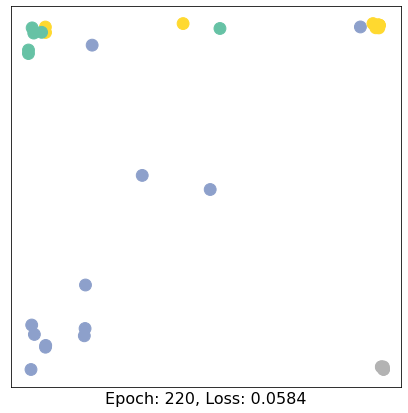

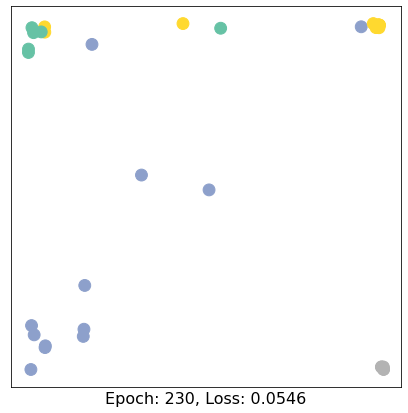

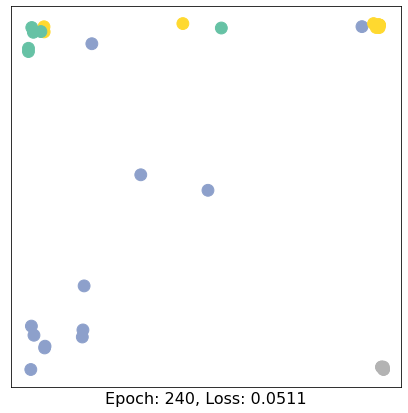

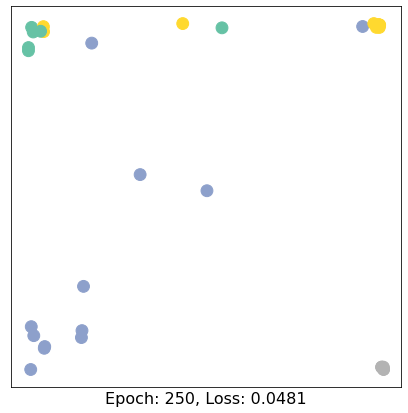

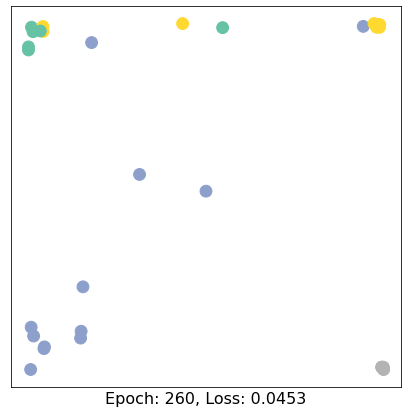

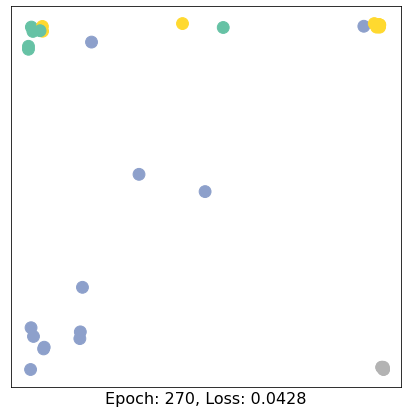

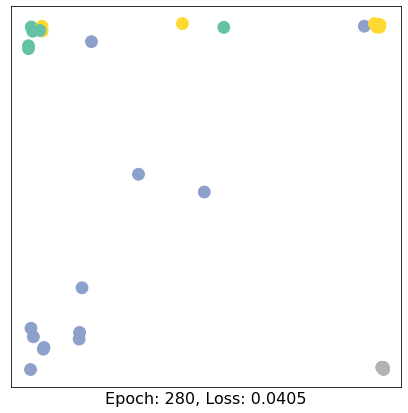

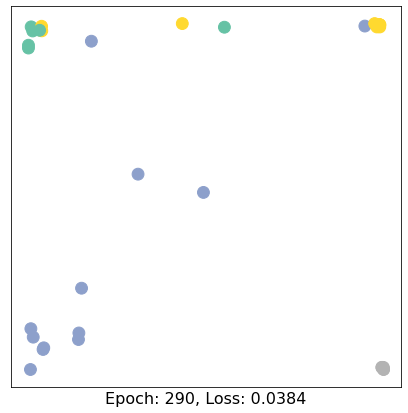

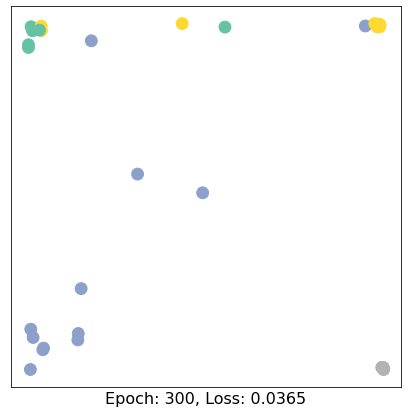

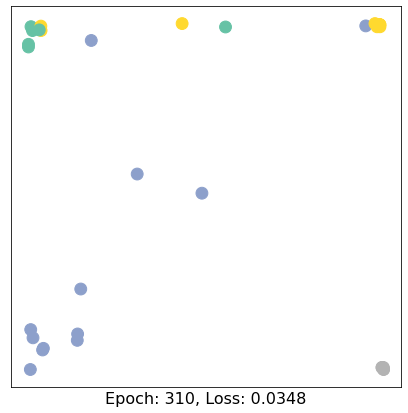

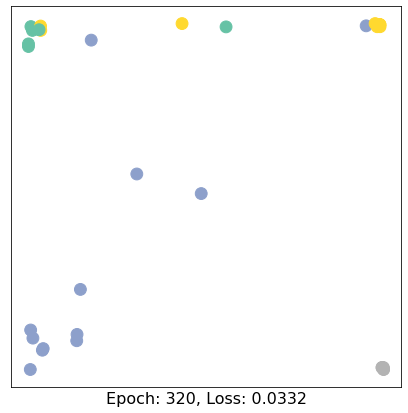

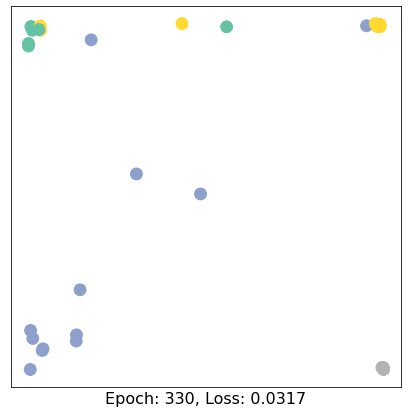

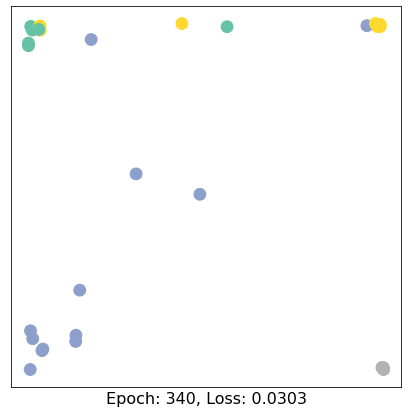

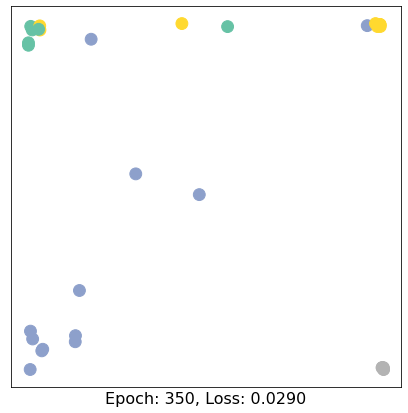

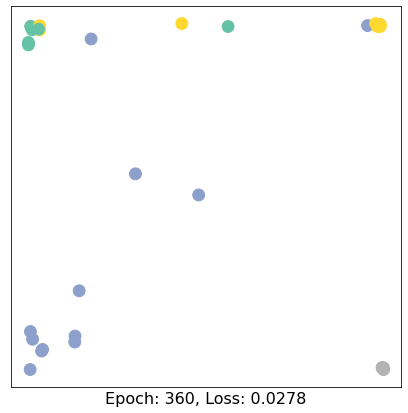

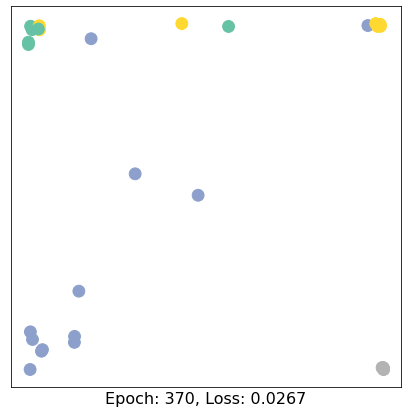

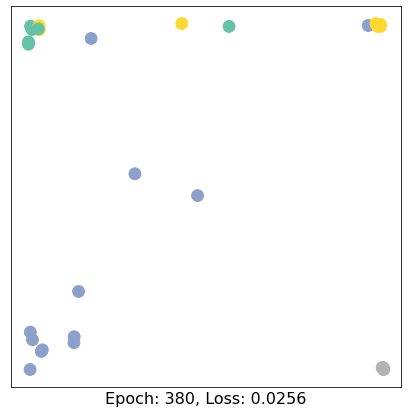

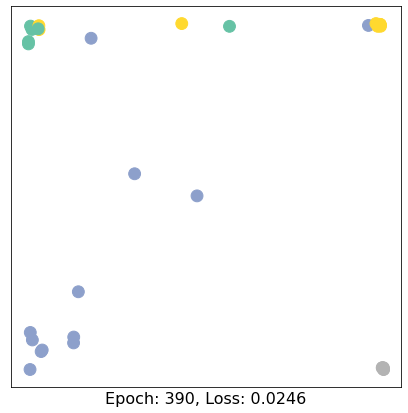

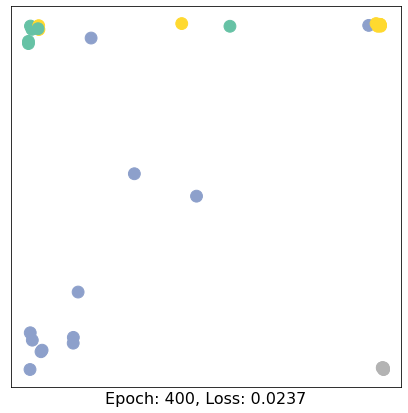

In [ ]:
def train(data):
  optimizer.zero_grad()
  out,h=model(data.x,data.edge_index)
  loss=loss_fn(out[data.train_mask],data.y[data.train_mask])
  loss.backward()
  optimizer.step()
  return loss,h
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

# Point_cloud classification

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_mesh(pos, face):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.plot_trisurf(pos[:, 0], pos[:, 1], pos[:, 2], triangles=data.face.t(), antialiased=False)
    plt.show()


def visualize_points(pos, edge_index=None, index=None):
    fig = plt.figure(figsize=(4, 4))
    if edge_index is not None:
        for (src, dst) in edge_index.t().tolist():
             src = pos[src].tolist()
             dst = pos[dst].tolist()
             plt.plot([src[0], dst[0]], [src[1], dst[1]], linewidth=1, color='black')
    if index is None:
        plt.scatter(pos[:, 0], pos[:, 1], s=50, zorder=1000)
    else:
       mask = torch.zeros(pos.size(0), dtype=torch.bool)
       mask[index] = True
       plt.scatter(pos[~mask, 0], pos[~mask, 1], s=50, color='lightgray', zorder=1000)
       plt.scatter(pos[mask, 0], pos[mask, 1], s=50, zorder=1000)
    plt.axis('off')
    plt.show()

GeometricShapes(40)


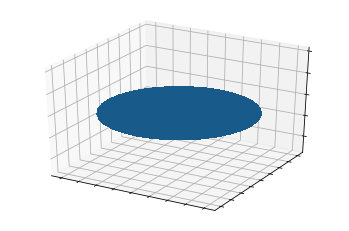

In [ ]:
from torch_geometric.datasets import GeometricShapes
dataset=GeometricShapes(root='data/GeometricShapes')
print(dataset)
data=dataset[0]
visualize_mesh(data.pos,data.face)

Data(face=[3, 2], pos=[4, 3], y=[1])


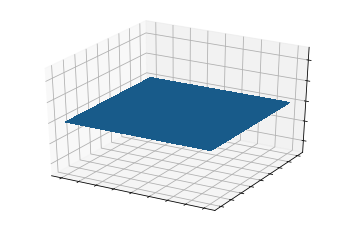

In [ ]:
data = dataset[4]
print(data)
visualize_mesh(data.pos, data.face)

Data(pos=[256, 3], y=[1])


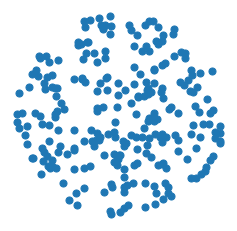

Data(pos=[256, 3], y=[1])


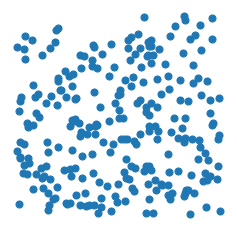

In [ ]:
import torch
from torch_geometric.transforms import SamplePoints

torch.manual_seed(42)

dataset.transform = SamplePoints(num=256)

data = dataset[0]
print(data)
visualize_points(data.pos, data.edge_index)

data = dataset[4]
print(data)
visualize_points(data.pos)

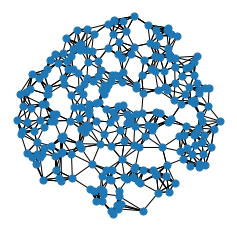

In [ ]:
from torch_cluster import knn_graph

data=dataset[0]
data.edge_index=knn_graph(data.pos,k=6)
visualize_points(data.pos,data.edge_index)

In [ ]:
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import MessagePassing


class PointNetLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        # Message passing with "max" aggregation.
        super(PointNetLayer, self).__init__('max')
        
        # Initialization of the MLP:
        # Here, the number of input features correspond to the hidden node
        # dimensionality plus point dimensionality (=3).
        self.mlp = Sequential(Linear(in_channels + 3, out_channels),
                              ReLU(),
                              Linear(out_channels, out_channels))
        
    def forward(self, h, pos, edge_index):
        # Start propagating messages.
        return self.propagate(edge_index, h=h, pos=pos)
    
    def message(self, h_j, pos_j, pos_i):
        # h_j defines the features of neighboring nodes as shape [num_edges, in_channels]
        # pos_j defines the position of neighboring nodes as shape [num_edges, 3]
        # pos_i defines the position of central nodes as shape [num_edges, 3]

        input = pos_j - pos_i  # Compute spatial relation.

        if h_j is not None:
            # In the first layer, we may not have any hidden node features,
            # so we only combine them in case they are present.
            input = torch.cat([h_j, input], dim=-1)

        return self.mlp(input)  # Apply our final MLP.

In [ ]:
import torch
import torch.nn.functional as F
from torch_cluster import knn_graph
from torch_geometric.nn import global_max_pool


class PointNet(torch.nn.Module):
    def __init__(self):
        super(PointNet, self).__init__()

        torch.manual_seed(12345)
        self.conv1 = PointNetLayer(3, 32)
        self.conv2 = PointNetLayer(32, 32)
        self.classifier = Linear(32, dataset.num_classes)
        
    def forward(self, pos, batch):
        # Compute the kNN graph:
        # Here, we need to pass the batch vector to the function call in order
        # to prevent creating edges between points of different examples.
        # We also add `loop=True` which will add self-loops to the graph in
        # order to preserve central point information.
        edge_index = knn_graph(pos, k=16, batch=batch, loop=True)
        
        # 3. Start bipartite message passing.
        h = self.conv1(h=pos, pos=pos, edge_index=edge_index)
        h = h.relu()
        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()

        # 4. Global Pooling.
        h = global_max_pool(h, batch)  # [num_examples, hidden_channels]
        
        # 5. Classifier.
        return self.classifier(h)


model = PointNet()
print(model)

PointNet(
  (conv1): PointNetLayer(
    (mlp): Sequential(
      (0): Linear(in_features=6, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
  )
  (conv2): PointNetLayer(
    (mlp): Sequential(
      (0): Linear(in_features=35, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
    )
  )
  (classifier): Linear(in_features=32, out_features=40, bias=True)
)


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

from torch_geometric.data import DataLoader

train_dataset = GeometricShapes(root='data/GeometricShapes', train=True,
                                transform=SamplePoints(128))
test_dataset = GeometricShapes(root='data/GeometricShapes', train=False,
                               transform=SamplePoints(128))


train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10)

model = PointNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.

def train(model, optimizer, loader):
    model.train()
    
    total_loss = 0
    for data in loader:
        optimizer.zero_grad()  # Clear gradients.
        logits = model(data.pos, data.batch)  # Forward pass.
        loss = criterion(logits, data.y)  # Loss computation.
        loss.backward()  # Backward pass.
        optimizer.step()  # Update model parameters.
        total_loss += loss.item() * data.num_graphs

    return total_loss / len(train_loader.dataset)


@torch.no_grad()
def test(model, loader):
    model.eval()

    total_correct = 0
    for data in loader:
        logits = model(data.pos, data.batch)
        pred = logits.argmax(dim=-1)
        total_correct += int((pred == data.y).sum())

    return total_correct / len(loader.dataset)

for epoch in range(1, 100):
    loss = train(model, optimizer, train_loader)
    test_acc = test(model, test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 01, Loss: 3.7417, Test Accuracy: 0.0500
Epoch: 02, Loss: 3.6927, Test Accuracy: 0.0250
Epoch: 03, Loss: 3.6678, Test Accuracy: 0.0500
Epoch: 04, Loss: 3.6418, Test Accuracy: 0.0500
Epoch: 05, Loss: 3.6065, Test Accuracy: 0.0250
Epoch: 06, Loss: 3.5239, Test Accuracy: 0.0250
Epoch: 07, Loss: 3.4593, Test Accuracy: 0.0500
Epoch: 08, Loss: 3.4031, Test Accuracy: 0.0750
Epoch: 09, Loss: 3.3603, Test Accuracy: 0.1250
Epoch: 10, Loss: 3.2833, Test Accuracy: 0.1000
Epoch: 11, Loss: 3.2131, Test Accuracy: 0.0750
Epoch: 12, Loss: 3.1571, Test Accuracy: 0.1500
Epoch: 13, Loss: 3.0433, Test Accuracy: 0.2250
Epoch: 14, Loss: 2.9361, Test Accuracy: 0.2250
Epoch: 15, Loss: 2.8487, Test Accuracy: 0.2250
Epoch: 16, Loss: 2.7454, Test Accuracy: 0.2750
Epoch: 17, Loss: 2.4577, Test Accuracy: 0.2500
Epoch: 18, Loss: 2.3837, Test Accuracy: 0.3750
Epoch: 19, Loss: 2.1589, Test Accuracy: 0.3750
Epoch: 20, Loss: 2.0265, Test Accuracy: 0.4750
Epoch: 21, Loss: 1.9849, Test Accuracy: 0.3750
Epoch: 22, Lo

# MnistGraph

In [ ]:
from torch_geometric.datasets import MNISTSuperpixels
dataset=MNISTSuperpixels('./data/',train=True)

In [ ]:
data=dataset[0]
print(data)
print("====================")
print(data.num_edges)
print(data.num_nodes)
print(data.num_features)
print(dataset.num_classes)

Data(edge_index=[2, 1399], pos=[75, 2], x=[75, 1], y=[1])
1399
75
1
10


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  3],
        [ 0,  8],
        [ 0, 10],
        ...,
        [74, 55],
        [74, 63],
        [74, 69]])


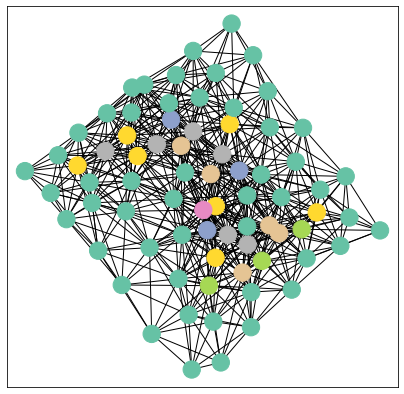

In [ ]:
from torch_geometric.utils import to_networkx
G=to_networkx(data,to_undirected=True)
visualize(G,color=data.x)

In [ ]:
from torch import nn 
from torch_geometric.nn import GCNConv,global_max_pool
import torch
class GCN(nn.Module):
  def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv=GCNConv(dataset.num_features,32)
        self.conv2=GCNConv(32,64)
        self.classifier=nn.Linear(64,dataset.num_classes)
  def forward(self,x,edge_index,batch):
    h=self.conv(x,edge_index)
    h=h.relu()
    h=self.conv2(h,edge_index)
    h=h.relu()
    h=global_max_pool(h,batch)
    out=self.classifier(h)
    return out,h

In [ ]:
model=GCN()
print(model)

GCN(
  (conv): GCNConv(1, 32)
  (conv2): GCNConv(32, 64)
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
from torch_geometric.data import DataLoader

train_dataset = MNISTSuperpixels(root='data/', train=True)
test_dataset = MNISTSuperpixels(root='data/', train=False)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
def train(data_loader):
  optimizer.zero_grad()
  total_loss=0
  for data in data_loader:
    out,h=model(data.x,data.edge_index,data.batch)
    loss=criterion(out,data.y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item() * data.num_graphs

    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(loader):
    model.eval()

    total_correct = 0
    for data in loader:
        logits,h = model(data.x,data.edge_index,data.batch)
        pred = logits.argmax(dim=-1)
        total_correct += int((pred == data.y).sum())

    return total_correct / len(loader.dataset)



In [ ]:
for epoch in range(1, 100):
    loss = train(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch: 01, Loss: 0.0012, Test Accuracy: 0.1028
Epoch: 02, Loss: 0.0012, Test Accuracy: 0.1028
